# MPAL1

Karyotype/Cytogenetics:
```
45,XY,del(6)(q13q21),-7,-8,-9,add(16)(p13),+2mar[cp19]/
46,XY[1]
```
Explanation (ref. https://en.wikipedia.org/wiki/Cytogenetic_notation): 
- 19 cells are coposite (mixed up), with a deletion of chromosome 7, 8, and 9 (i.e., only one copy of 7, 8, and 9 are left). A small deletion on 6 and a addition on 16. A portion of 2 is shown.
- 1 cell is normal (i.e., it has two copies of each chromosome, except for XY).

Thus, we expect to see bimodal distribution on Chr7, 8, and 9.

In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Relative Number

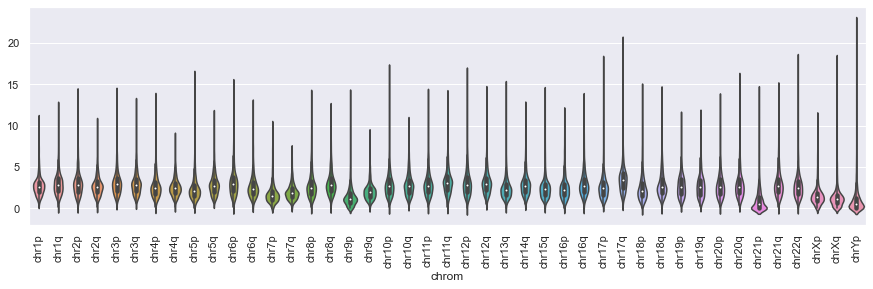

In [33]:
cnv_df_copyscat_relative = pd.read_csv("results/GSM4138898_scATAC_MPAL1_T1_intermediate0.csv", index_col=0).T
sns.set(rc={'figure.figsize':(15,4)})
g = sns.violinplot(data=cnv_df_copyscat_relative)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
pass # suppress output

## CopyscAT produced absolute number

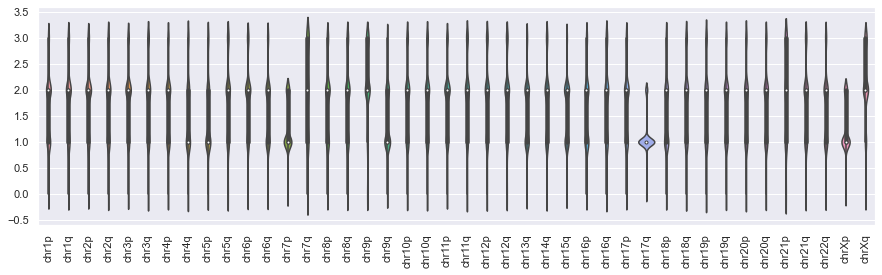

In [30]:
cnv_df_copyscat_absolute = pd.read_csv("results/GSM4138898_scATAC_MPAL1_T1_intermeiate1.csv", index_col=0)
sns.set(rc={'figure.figsize':(15,4)})
g = sns.violinplot(data=cnv_df_copyscat_absolute)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
pass # suppress output

## Investigate chr7p

<AxesSubplot:>

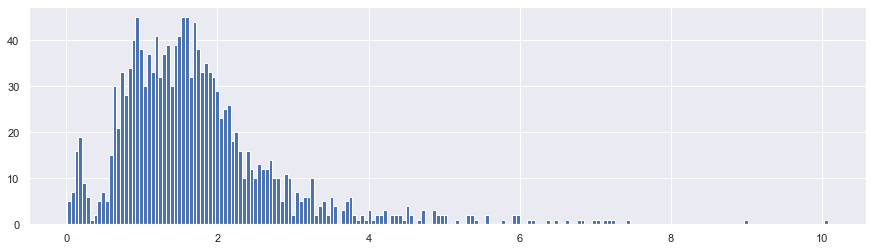

In [48]:
cnv_df_copyscat_relative.chr7p.hist(bins=200)

### Fourier transform
$\delta(\bullet)$ is Dirac delta.

$$f(x) = \sum_i\delta(x-x_i)$$

$$F(\omega)=\mathcal{F}_x[f(x)](\omega)=\int_{-\infty}^{\infty}f(x)e^{i\omega x}$$

$$F(\omega)=\mathcal{F}_x[\sum_i\delta(x-x_i)](\omega)=\sum_i\mathcal{F}_x[\delta(x-x_i)](\omega)=\sum_ie^{i\omega x_i}$$

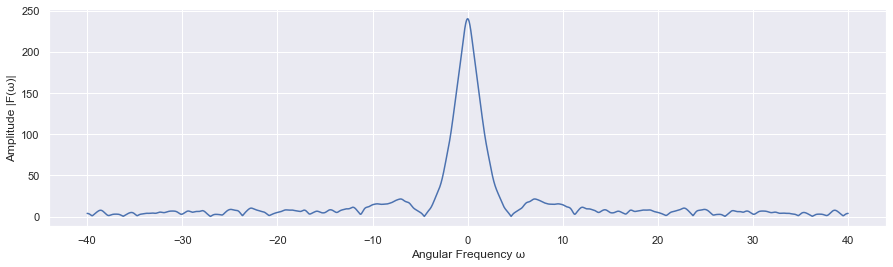

In [106]:
w_list = np.arange(-40, 40, 0.005)
y_list = (np.exp(1j * w_list.reshape([-1, 1]) * cnv_df_copyscat_relative.chr7p.to_numpy().reshape([1, -1]))).sum(axis=1) / (2 * np.pi)
    
y_list = abs(y_list)
    
plt.plot(w_list, y_list)

plt.xlabel("Angular Frequency ω")
plt.ylabel("Amplitude |F(ω)|")
pass

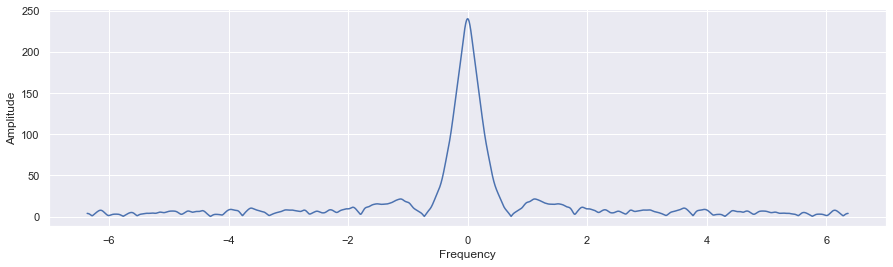

In [97]:
plt.plot(w_list / (2 * np.pi), y_list)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
pass

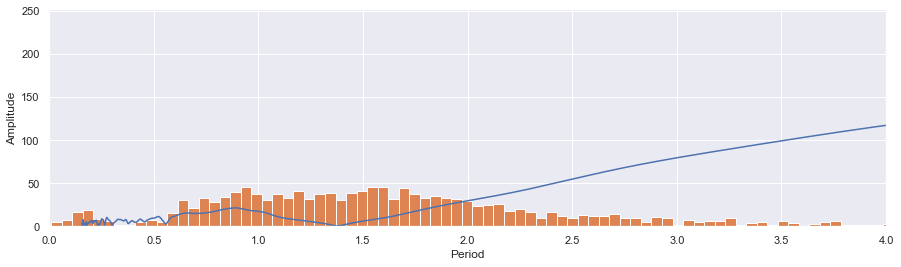

In [101]:
plt.plot((2 * np.pi) / w_list[w_list > 0], y_list[w_list > 0])
plt.xlim([0, 4])
plt.xlabel("Period")
plt.ylabel("Amplitude")
cnv_df_copyscat_relative.chr7p.hist(bins=200)
pass

## Demo

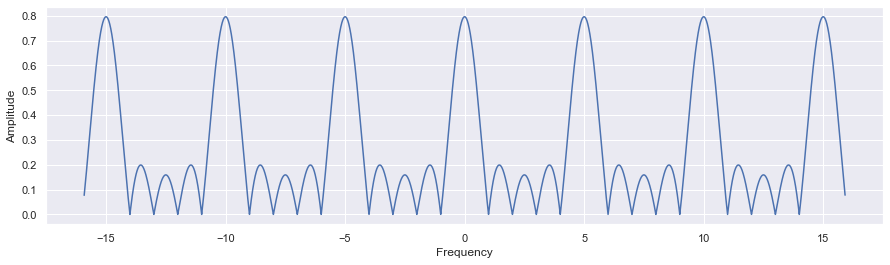

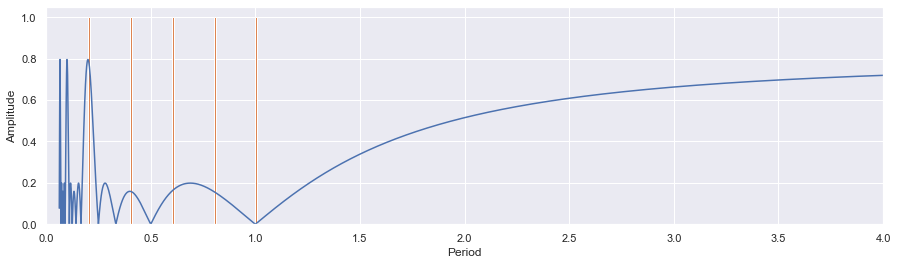

In [147]:
f = [0.2, 0.4, 0.6, 0.8, 1.0]
w_list = np.arange(-100, 100, 0.005)
y_list = (np.exp(1j * w_list.reshape([-1, 1]) * np.array(f).reshape([1, -1]))).sum(axis=1) / (2 * np.pi)
    
y_list = abs(y_list)

plt.plot(w_list / (2 * np.pi), y_list)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

plt.figure()

plt.plot((2 * np.pi) / w_list[w_list > 0], y_list[w_list > 0])
plt.xlim([0, 4.])
plt.xlabel("Period")
plt.ylabel("Amplitude")
plt.hist(f, bins=np.arange(0.0, 1.9, 0.01))
pass

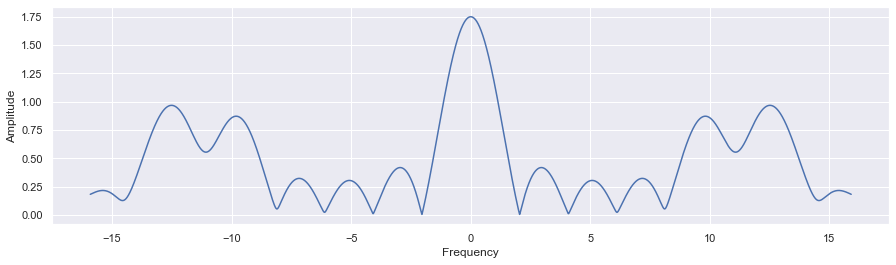

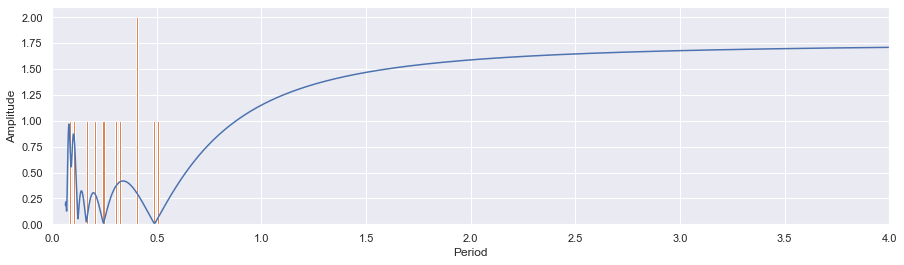

In [128]:
f = [0.1, 0.2, 0.3, 0.4, 0.5, 0.08, 0.16, 0.24, 0.32, 0.4, 0.48]
w_list = np.arange(-100, 100, 0.005)
y_list = (np.exp(1j * w_list.reshape([-1, 1]) * np.array(f).reshape([1, -1]))).sum(axis=1) / (2 * np.pi)
    
y_list = abs(y_list)

plt.plot(w_list / (2 * np.pi), y_list)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

plt.figure()

plt.plot((2 * np.pi) / w_list[w_list > 0], y_list[w_list > 0])
plt.xlim([0, 4.])
plt.xlabel("Period")
plt.ylabel("Amplitude")
plt.hist(f, bins=np.arange(0.0, 4.0, 0.01))
pass